## 0. 공통 수행
- summary, plot...
- Continuous variable: hist, boxplot, density, mean, t.test...
- Categorical variable: table, **barplot(table(x)**, binom.test...
- Continuous x and y: plot, cor, lm, lqs...
- Categorical x and Continuous y: ANOVA, boxplot, lm...
- Continuous x and Categorical y: glm(family = 'binom')

-----

## 1. Continuous variables EDA
- 데이터의 정규성 검사: qqplot, qqline() function은 분포가 정규분포와 얼마나 유사한지 검사하는데 사용된다
- 가설검정과 신뢰구간: t.test()로 일변량 t-검정과 신뢰구간 구할 수 있다. 실제로는 데이터의 분포가 정규분포가 아니라도 큰 문제 안된다.
- 이상점 찾기: 로버스트 통계량

In [3]:
library(ggplot2)
library(dplyr)
class(mpg$hwy)

Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "integer"

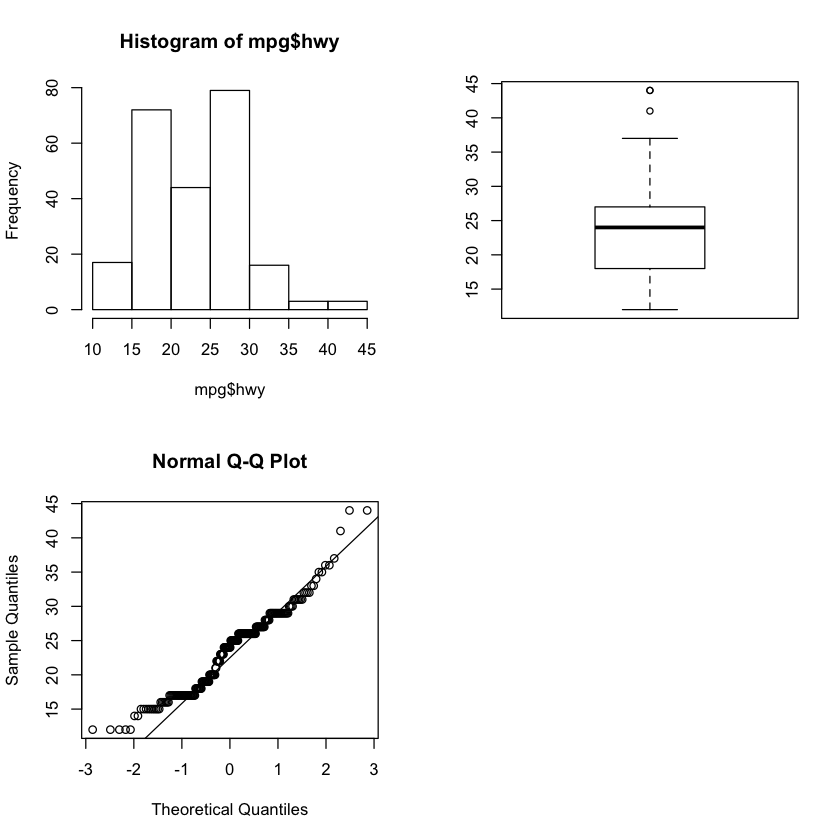

In [3]:
opar <- par(mfrow = c(2, 2))
hist(mpg$hwy)
boxplot(mpg$hwy)
qqnorm(mpg$hwy)
qqline(mpg$hwy)
par(opar)

### a. One sample t.test
- H0: mu <= 22.9 vs H1: mu > 22.9

In [5]:
mu0 <- 22.9
t.test(mpg$hwy, mu = mu0, alternative = 'greater')


	One Sample t-test

data:  mpg$hwy
t = 1.3877, df = 233, p-value = 0.08328
alternative hypothesis: true mean is greater than 22.9
95 percent confidence interval:
 22.79733      Inf
sample estimates:
mean of x 
 23.44017 


_만약 실제 모 평균 고속도로 연비가 22.9라면(=귀무가설 하에서) 우리가 관측한 것 만큼 큰 표본평균값과 t 통계량이 관측될 확률이 8.3_

    a. t.test 세부 설명 참고
        - <http://www.dodomira.com/2016/04/02/r%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-t-test/>
        - <http://rfriend.tistory.com/127>

### b. Outliers and Robust statistical methods
- 로버스트 통계 방법은 이상점의 영향을 적게 받는 절차
- mean 대신 median, SD 대신 Median Absolute Deviance를 사용

In [7]:
c(mean(mpg$hwy), sd(mpg$hwy))

[1] 23.440171  5.954643

In [8]:
c(median(mpg$hwy), mad(mpg$hwy))

[1] 24.000  7.413

-----

## 2. 성공 - 실패 범주형 변수 분석
- 요약 통계량 계산: table(도수 분포), prop.table(상대도수)
- 데이터 분포의 시각화: barplot()
- 가설검정과 신뢰구간: binom.test() 함수를 이용해 성공률(1, 성공 or 해당)에 대한 검정과 신뢰구간을 구할 수 있다.

[1] yes yes yes yes no  no  yes no  no  yes yes no  no  yes no  no  yes yes
 [19] yes no  yes yes no  no  yes no  no  yes no  no  yes no  yes yes no  no 
 [37] yes yes no  yes no  no  no  yes yes no  yes yes yes yes no  yes no  yes
 [55] yes no  no  yes yes yes yes yes yes no  no  no  yes no  no  yes no  no 
 [73] yes no  yes yes yes no  yes no  no  no  no  yes yes yes yes no  yes yes
 [91] no  no  no  no  yes yes yes yes no  yes
Levels: no yes

x
 no yes 
 46  54 

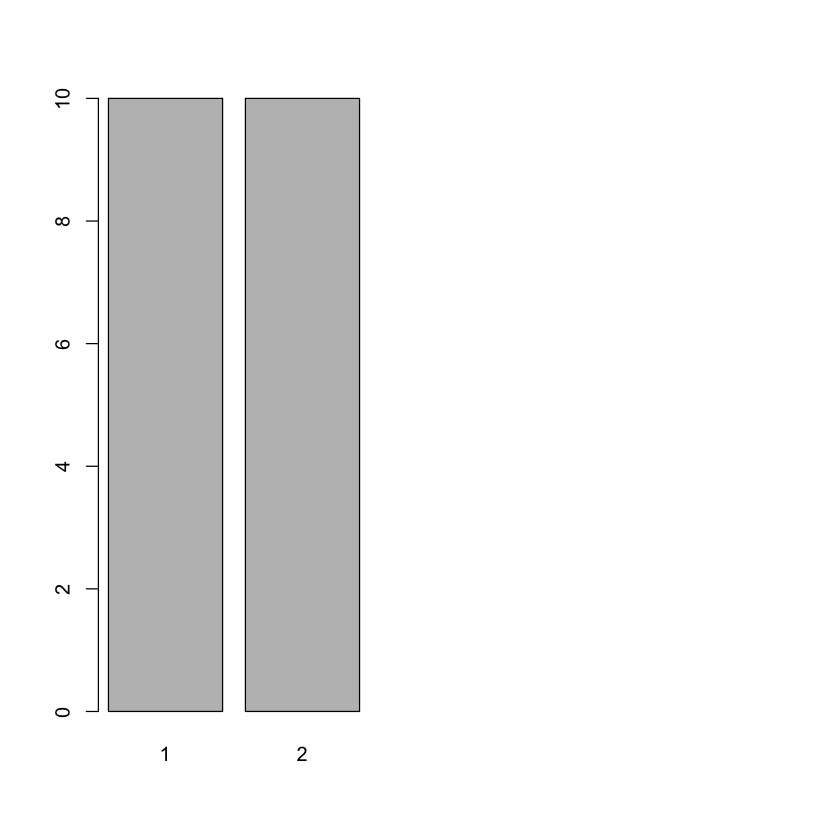

In [15]:
set.seed(1606)
n <- 100
p <- .5
x <- rbinom(n, 1, p)

x <- factor(x, levels = c(0,1), labels = c('no', 'yes'))
x
table(x)
opar_2 <- par(mfrow = c(1, 2))
barplot(table(sleep$group))
par(opar)

_- 우리는 p값 설정을 통해 실제 지지율이 50%임을 알고 있지만, 모른다고 가정 후 검정 진행_<br/>
_- H0: p = 0.5 vs H1: p != 0.5_

In [16]:
binom.test(x = length(x[x == 'yes']), n = length(x), p = 0.5, alternative = 'two.sided')


	Exact binomial test

data:  length(x[x == "yes"]) and length(x)
number of successes = 54, number of trials = 100, p-value = 0.4841
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4374116 0.6401566
sample estimates:
probability of success 
                  0.54 


1. 귀무가설 H0: p = 0.5가 참일 때, 주어진 데이터만큼 극단적인 데이터를 관측할 확률은 48%. 귀무가설을 기각할 증거 희박.
2. 95 percent confidence interval의 의미:
    - '모수가 주어진 신뢰구간에 포함될 확률'은 말도 안된다. **모수는 우리가 값을 모를 뿐 상수이다.** 때문에 '모수가 xxx할 확률'은 안된다.<br/>
      이미 구해진 신뢰구간은 참 모수를 포함하든가 아니면 포함하지 않든가 둘 중 하나다.
    - 정확한 정의는 '같은 모형에서 반복해서 표본을 얻고, 신뢰구간을 얻을 때 신뢰구간이 참 모수값을 포함할 확률이 95%가 되도록 만들어진 구간'

----

## 3. 설명변수(explanatory variable)와 반응변수(response variable)
- 보통 인과관계에서 원인이 되는 것으로 믿이지는 변수를 X, 결과가 되는 변수를 Y (_아버지의 키 X - 아들의 키 Y, 약의 종류 및 복용량 X - 효과 Y_)
- explanatory = 예측(predictor) = 독립(independent)
- response = 종속(dependent)

-----

## 4. Continuous X and Y
1. plotting 통해 관계의 모양을 파악. 관계가 선형인지, 세기가 어떤지, 이상치는 어떤지 파악한다.
2. 상관계수를 계산한다. (**상관계수는 '선형'관계의 강도만을 재는 것**, cor() 함수는 기본적으로 Pearson 상관계수 계산(로버스트한 method = 'kendall' 옵션 선택 가능) <br/>
 산점도를 그리지 않고 상관계수만 보는 것은 위험. 다양한 비선형적 관계와 데이터 군집성 등의 패턴 알기 위해 시각화 필요!
3. **선형 모형을 적합한다(규봉: 후에 진단).** 모형의 적합도와 모수의 의미를 살펴본다.
4. 잔차의 분포를 살펴본다. 잔차의 이상점은 없는지, 잔차가 예측(독립, 설명)변수에 따라서 다른 분산을 갖지는 않는지 본다.
5. 이상치가 많을 경우 로버스트 회귀분석을 적용한다.
6. 비선형 데이터에는 LOESS 등의 평활법을 사용한다.

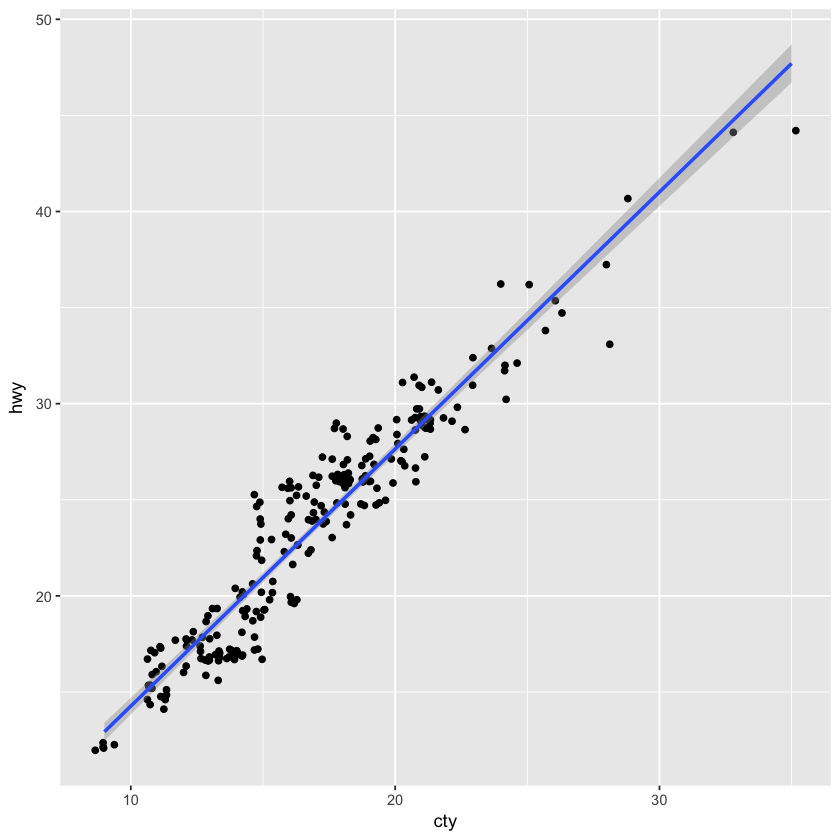

In [20]:
ggplot(mpg, aes(cty, hwy)) + geom_jitter() + geom_smooth(method = 'lm')
par(opar_2)

---

### a. Linear regression model fitting

- Yi ~ beta0 + beta1x1 + ... + betanxn ei, ei ~ iidN(0, sigma^2)
- xij는 j번째 설명변수의 i번째 관측치
- iid는 독립이고 동일한 분포를 따름을 나타낸다.
- 모수는 절편(intercept) beta0, 계수(slope) betan, 오차항(error term)의 분포의 분산 sigma^2
- lm() 함수는 위의 선형 모형을 Least Square Method로 추정. 즉, 잔차의 제곱합을 최조화하는 문제를 풀어 추정치를 구한다. [(sum(yi - (b0 +b1xi))^2]
    + 모형적합(model fitting)이란, 관측된 데이터를 사용해 우리가 모르는 beta값을 알아내는 작업
- lm.summary()는 각 추정치와 더불어, 각 모수값이 0인지 아닌지에 대한 가설검정 결과를 보여준다. 즉, 절편에 대한 H0: beta0 = 0 vs H1: beta0 != 0,<br\>계수에 대한 H0: beta1 = 0 vs beta1 != 0에 대한 검정 결과를 보여준다.
- 이 가설들은 t.test로 주어진다. 따라서 추정값(estimate), 표준편차(standard **error**), 그리고 그 비율로서의 t-value(= estimate / SE),<br\> 그리고 적절한 자유도에 대한 P-값(Pr(>|t|))을 보여준다.

In [22]:
summary(lm(mpg$hwy ~ mpg$cty, data = mpg))


Call:
lm(formula = mpg$hwy ~ mpg$cty, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3408 -1.2790  0.0214  1.0338  4.0461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.89204    0.46895   1.902   0.0584 .  
mpg$cty      1.33746    0.02697  49.585   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.752 on 232 degrees of freedom
Multiple R-squared:  0.9138,	Adjusted R-squared:  0.9134 
F-statistic:  2459 on 1 and 232 DF,  p-value: < 2.2e-16


_a. hwy 값에 대한 cty의 선형 효과는 통계적으로 유의하다. 귀무가설 하 처럼 beta1 = 0일 경우 지금처럼 t값 관측은 거의 불가.
따라서 귀무가설을 기각_<br/>
_b. F-statistic은 H0: 평균(절편) 외에 '다른 모수는 효과가 없다 vs H1: not H0'이라는 가설에 대한 검정통계량이다.<br/>
    설명변수가 하나인 경우엔 지금처럼 계수에 대한 t-검정 결과와 동일. 하지만 여러개일 때라면 **모든 설명변수를 아울러서 유의성을 검정하는 통계량**_

### b. Model Diagnostics for Regression
- 선형회귀 결과가 의미가 있으려면 다음의 가정 충족해야 한다.<br/>
    a. x와 y의 관계가 선형이다. <br/>
    b. 잔차의 분포가 독립이다. <br/>
    c. 잔차의 분포가 동일하다. <br/>
    d. 잔차의 분포가 N(0, sigma^2)
<br/>
- 일변량 수치변수에서의 t-검정과 유사하게, 가장 만족하기 어려운 조건 d는 못 지킬 수 있다.
- 하지만 조건 c가 어긋나는 경우, 분산이 x 값에 따라 변하는 것은 추정치와 오차의 유효성에 영향을 준다.<br/>
 (이러한 오차분포를 이분산성 오차 분포 heteroscedastic error distribution)<br/>
 이런 경우 보통 가중회귀분석(weighted regression)을 이용한다.
- 조건 a, b가 어긋나면 모든 모수의 의미가 왜곡되게 되므로 시각적으로 잔차의 분포가 x에 따라, y에 따라 변하는지 봐야한다.(regression diagnostic)

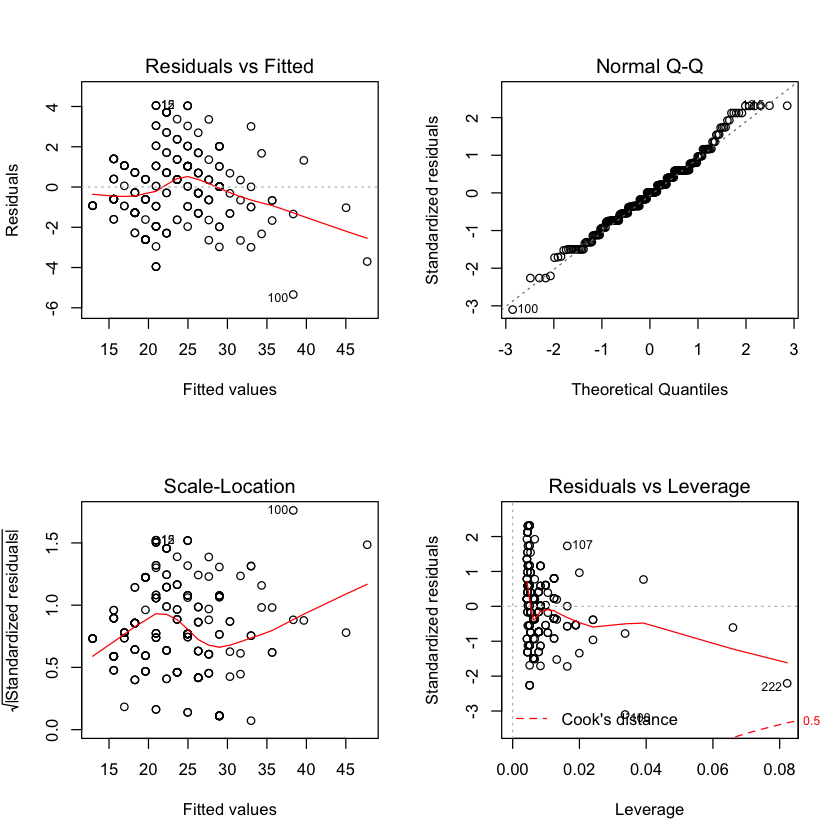

In [4]:
par(mfrow = c(2, 2))
plot(lm(hwy ~cty, data = mpg))
par(mfrow = c(1, 1))

1. Residual vs Fitted: 잔차의 분포가 예측값과 독립인지 확인
2. Normal Q-Q: 표준화된 잔차의 분포가 정규분포에 가까운지 확인
3. Scale-Location: 잔차의 절대값의 제곱근과 예측값 사이의 관계 확인
4. Residual vs Leverage: 표준화된 잔차와 레버리지 간의 관계 확인<br/>
<br/>

| 회귀 진단 중 중요한 수치중 하나인 레버리지: Leverage hii는 Projection Matrix의 i번째 diagonam matrix.<br/>
    만약 hii 값이 크면 yi 값의 작은 변화에도 적합값 yi hat이 yi 방향으로 더 많이 **끌려가게**된다. 즉, 더 많은 influence 받는다.

### c. 로버스트 선형회귀분석
- 수량형 변수에 이상치가 있을 경우 로버스트 통계방법을 이용하는 것이 좋다.
- **선형회귀분석의 모수 추정값은 '잔차의 분포에서 이상치가 있을 때' 지나치게 민감하게 반응한다. 이는 모수를 추정할 때 최소제곱법을 사용하기 때문이다.**<br/>
  이상치에 민감하지 않은 추정법이 필요할 때에는 로버스트 회귀분석을 사용한다.

In [5]:
library(MASS)
set.seed(123)
lqs(stack.loss ~., data = stackloss)
#lqs() 함수는 데이터 중 '좋은' 관측치만 적합에 사용한다.(제곱오차의 quantile 최소화)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Call:
lqs.formula(formula = stack.loss ~ ., data = stackloss)

Coefficients:
(Intercept)     Air.Flow   Water.Temp   Acid.Conc.  
 -3.631e+01    7.292e-01    4.167e-01   -8.131e-17  

Scale estimates 0.9149 1.0148 


In [6]:
lm(stack.loss ~., data = stackloss)


Call:
lm(formula = stack.loss ~ ., data = stackloss)

Coefficients:
(Intercept)     Air.Flow   Water.Temp   Acid.Conc.  
   -39.9197       0.7156       1.2953      -0.1521  


* Acid.Conc 변수의 효과에 차이가 있다.

### d. 비선형/비모수적 방법, 평활법과 LOESS
- 선형회귀분석은 모형이 '선형'임을 가정한다.
- 비선형적인 x-y 관계를 추정해내기 위해서는 nonlinear regression이나 polynomial regression을 사용하기도 한다. <br/>
  (규봉: 하지만 이들도 linearizable regression model로 x,y 변수들에 변환을 취하면 linear regression이라 볼 수 있다.)
- 하지만 이러한 모형들보다 손쉽게 사용할 수 있는 것은 모형에 아무 가정도 하지 않는 smoothing이다.
    + yi = f(xi) + ei, ei ~ iid(0, sigma^2)
    + f(x)는 보통 두 번 미분 가능한 것으로 정의하며 선형함수일 필요가 없다.
    + 잔차가 정규분포일 필요가 없다.
<br/>
- 다양한 smoothing 기법 중 local regression 방법인 LOESS(locally weighted scatterplot smoothing)이 선호된다. <br/>
    각 예측변수 x0 값에서 가장 가까운 k개의 (xi, yi) 관측치들을 사용해 2차 다항회귀(ploynomial) 모형을 적합해 f hat(x0)을 추정하고,<br/>
    이것을 다양한 x0 값에 대해 반복하는 것이다. 크기가 변하는 window를 좌에서 우로 이동하며 로컬하게 간단한 모형을 적합하는 것.<br/>
    (평활의 정도인 파라미터 k값은 CV로 최적화)

Call:
loess(formula = hwy ~ displ, data = mpg)

Number of Observations: 234 
Equivalent Number of Parameters: 4.57 
Residual Standard Error: 3.372 
Trace of smoother matrix: 4.98  (exact)

Control settings:
  span     :  0.75 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

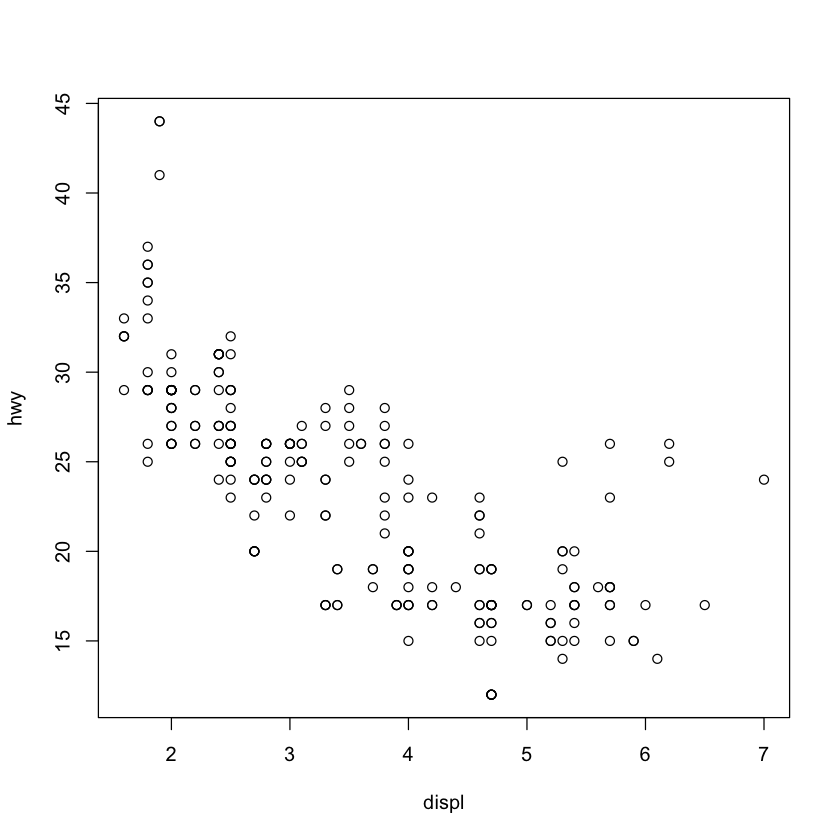

In [8]:
plot(hwy ~ displ, data = mpg)
mpg_lo <- loess(hwy ~ displ, data = mpg) #loess()
summary(mpg_lo)

`geom_smooth()` using method = 'loess'


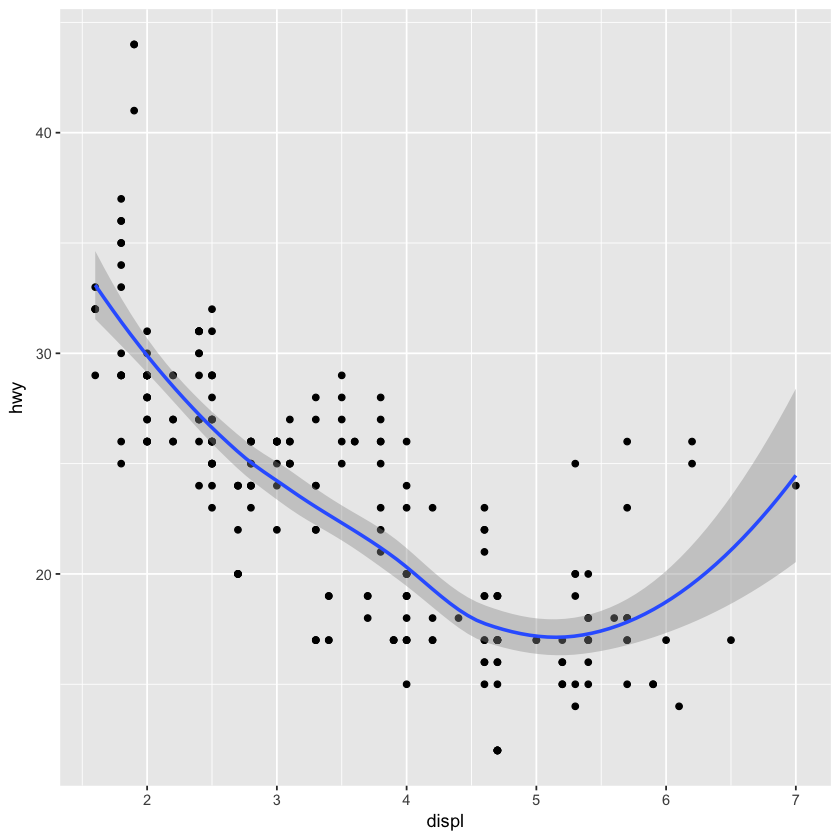

In [10]:
ggplot(mpg, aes(displ, hwy)) +
geom_point() +
geom_smooth()